# Data Cleaning and Merging

This notebook loads the ACS sample data, merges it with Industry and Occupation codes, and performs data cleaning and analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## 1. Load Data

In [2]:
# Define paths
data_dir = "../data/raw"
processed_dir = "../data/processed"
acs_path = f"{data_dir}/Sample ACS 2021 for LMU.csv"
ind_path = f"{data_dir}/IND_Codes.csv"
occsoc_path = f"{data_dir}/OCCSOC_Codes.csv"

# Load data with latin1 encoding to handle special characters
acs_df = pd.read_csv(acs_path, encoding='latin1')
ind_df = pd.read_csv(ind_path, dtype={'IND Codes': str}, encoding='latin1')
occsoc_df = pd.read_csv(occsoc_path, dtype={'2018 Onward ACS/PRCS': str}, encoding='latin1')

print(f"ACS shape: {acs_df.shape}")
print(f"IND shape: {ind_df.shape}")
print(f"OCCSOC shape: {occsoc_df.shape}")

/var/folders/l5/9tzh8xvn4c9bb2qc2r3pkqtc0000gn/T/ipykernel_10744/1697480159.py:9: DtypeWarning: Columns (5,15,37) have mixed types. Specify dtype option on import or set low_memory=False.
  acs_df = pd.read_csv(acs_path, encoding='latin1')


ACS shape: (502363, 42)
IND shape: (271, 4)
OCCSOC shape: (531, 4)


## 2. Merge Data

We merge the ACS data with Industry and Occupation codes using `IND` and `OCCSOC` columns.

In [3]:
# Ensure merge keys are strings and padded if necessary
acs_df['IND'] = acs_df['IND'].astype(str).str.zfill(4)
ind_df['IND Codes'] = ind_df['IND Codes'].astype(str).str.zfill(4)

acs_df['OCCSOC'] = acs_df['OCCSOC'].astype(str)
occsoc_df['2018 Onward ACS/PRCS'] = occsoc_df['2018 Onward ACS/PRCS'].astype(str)

# Merge IND
merged_df = acs_df.merge(ind_df, left_on='IND', right_on='IND Codes', how='left')

# Merge OCCSOC
final_df = merged_df.merge(occsoc_df, left_on='OCCSOC', right_on='2018 Onward ACS/PRCS', how='left')

print(f"Final merged shape: {final_df.shape}")
final_df.head()

Final merged shape: (502363, 50)


,REGION,STATEFIP,PERWT,NCHILD,SEX,AGE,MARST,MARRNO,RACE,RACED,BPL,BPLD,ANCESTR1,ANCESTR1D,CITIZEN,YRNATUR,LANGUAGE,LANGUAGED,SPEAKENG,EDUC,EDUCD,DEGFIELD,DEGFIELDD,DEGFIELD2,DEGFIELD2D,EMPSTAT,EMPSTATD,CLASSWKR,CLASSWKRD,OCCSOC,IND,WKSWORK1,UHRSWORK,INCTOT,INCWAGE,INCINVST,INCOTHER,INCEARN,TRANWORK,TRANTIME,DEPARTS,ARRIVES,IND Codes,Industry,Category,Sub Category_x,Main Category,Sub Category_y,2018 Onward ACS/PRCS,Occupation title
0,East South Central Div.,Alabama,48.0,0 children present,Male,20,Never married/single,Not Applicable,Black/African American,Black/African American,Georgia,Georgia,African-American,"African-American (1990-2000, ACS, PRCS)",NaN,NaN,English,English,"Yes, speaks only English",1 year of college,"1 or more years of college credit, no degree",NaN,NaN,NaN,NaN,Employed,At work,Works for wages,"Wage/salary, private",399041,7870,52,40,6300,6300,0,0,6300,"Auto, truck, or van",5,1915,1909,7870,"Colleges, universities, and professional schoo...","Educational Services, and Health Care and Soci...",Educational Services,SERVICE OCCUPATIONS:,Personal Care and Service Occupations:,399041,Residential Advisors
1,East South Central Div.,Alabama,9.0,0 children present,Female,52,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",NaN,NaN,English,English,"Yes, speaks only English",Grade 12,Regular high school diploma,NaN,NaN,NaN,NaN,Employed,At work,Works for wages,"Wage/salary, private",537051,6390,52,40,40600,40600,0,0,40600,"Auto, truck, or van",5,802,809,6390,Warehousing and storage,"Transportation and Warehousing, and Utilities ...","Transportation and Warehousing, and Utilities ...","PRODUCTION, TRANSPORTATION, AND MATERIAL MOVIN...",Material Moving Occupations:,537051,Industrial Truck and Tractor Operators
2,East South Central Div.,Alabama,46.0,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",NaN,NaN,English,English,"Yes, speaks only English",Grade 12,"Some college, but less than 1 year",NaN,NaN,NaN,NaN,Employed,At work,Works for wages,State govt employee,412010,5391,52,41,6000,6000,0,0,6000,"Auto, truck, or van",25,532,559,5391,"General merchandise stores, including warehous...",Retail Trade,Retail Trade,SALES AND OFFICE OCCUPATIONS:,Sales and Related Occupations:,412010,Cashiers
3,East South Central Div.,Alabama,54.0,0 children present,Male,20,Never married/single,Not Applicable,Black/African American,Black/African American,Georgia,Georgia,African-American,"African-American (1990-2000, ACS, PRCS)",NaN,NaN,English,English,"Yes, speaks only English",1 year of college,"1 or more years of college credit, no degree",NaN,NaN,NaN,NaN,Employed,At work,Works for wages,"Wage/salary, private",399041,7870,52,40,6300,6300,0,0,6300,"Auto, truck, or van",5,1915,1909,7870,"Colleges, universities, and professional schoo...","Educational Services, and Health Care and Soci...",Educational Services,SERVICE OCCUPATIONS:,Personal Care and Service Occupations:,399041,Residential Advisors
4,East South Central Div.,Alabama,42.0,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Florida,Florida,African-American,"African-American (1990-2000, ACS, PRCS)",NaN,NaN,English,English,"Yes, speaks only English",Grade 12,"Some college, but less than 1 year",NaN,NaN,NaN,NaN,Employed,At work,Works for wages,"Wage/salary, private",352010,8680,52,35,26400,26400,0,0,26400,Walked only,3,1455,1459,8680,Restaurants and other food services,"Arts, Entertainment, and Recreation, and Accom...",Accommodation and Food Services,SERVICE OCCUPATIONS:,Food Preparation and Serving Related Occupations:,352010,Cooks


## 3. Data Cleaning

### Missing Values

In [4]:
# Check for missing values
missing = final_df.isnull().sum()
print(missing[missing > 0])

CITIZEN       417352
YRNATUR       456165
DEGFIELD      281237
DEGFIELDD     281237
DEGFIELD2     477159
DEGFIELD2D    477159
dtype: int64


### Categorical Variables

In [5]:
categorical_cols = ['SEX', 'RACE', 'EDUC', 'EMPSTAT', 'Industry', 'Occupation title']

for col in categorical_cols:
    if col in final_df.columns:
        print(f"\n--- {col} ---")
        print(final_df[col].value_counts().head(10))


--- SEX ---
SEX
Male      281131
Female    221232
Name: count, dtype: int64

--- RACE ---
RACE
White                               341672
Two major races                      47348
Black/African American               40424
Other race, nec                      28744
Other Asian or Pacific Islander      26161
Chinese                               8486
American Indian or Alaska Native      5131
Three or more major races             3027
Japanese                              1370
Name: count, dtype: int64

--- EDUC ---
EDUC
Grade 12               149745
4 years of college     131825
5+ years of college     89301
1 year of college       60621
2 years of college      47768
Grade 5, 6, 7, or 8      5797
N/A or no schooling      5763
Grade 11                 4201
Grade 10                 3206
Grade 9                  2930
Name: count, dtype: int64

--- EMPSTAT ---
EMPSTAT
Employed    502363
Name: count, dtype: int64

--- Industry ---
Industry
Construction (the cleaning of buildings and dwell

### Outliers

Analyzing `INCTOT` (Total Income), `AGE`, and `UHRSWORK`.

In [6]:
# Handle non-numeric values in numeric columns (e.g. '90 (90+ in 1980 and 1990)' in AGE)
numeric_cols = ['INCTOT', 'AGE', 'UHRSWORK', 'INCWAGE', 'WKSWORK1']

for col in numeric_cols:
    final_df[col] = pd.to_numeric(final_df[col], errors='coerce')

final_df[numeric_cols].describe()

,INCTOT,AGE,UHRSWORK,INCWAGE,WKSWORK1
count,5.023630e+05,502353.000000,501524.000000,502363.000000,502363.000000
mean,8.091739e+04,44.713486,43.693261,73129.947046,51.980297
std,8.742044e+04,13.331321,7.813540,78261.462905,0.190678
min,-9.500000e+03,16.000000,35.000000,0.000000,50.000000
25%,3.600000e+04,34.000000,40.000000,33000.000000,52.000000
50%,5.800000e+04,45.000000,40.000000,53000.000000,52.000000
75%,9.250000e+04,56.000000,45.000000,86000.000000,52.000000
max,1.487400e+06,95.000000,98.000000,787000.000000,52.000000


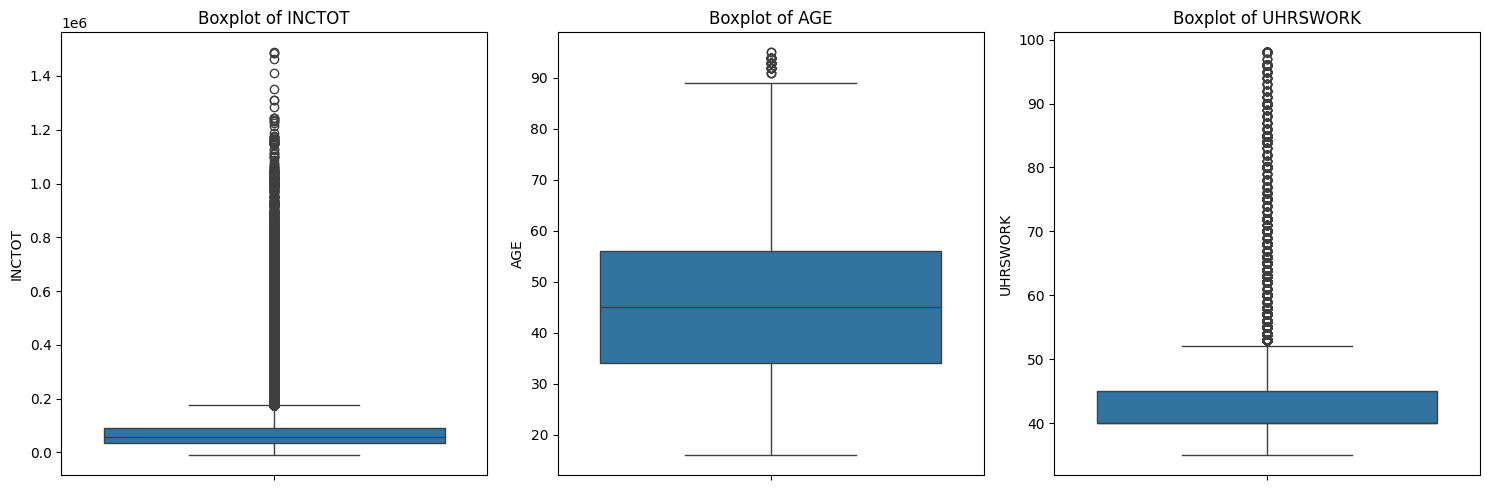

In [7]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(['INCTOT', 'AGE', 'UHRSWORK']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=final_df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### Handling Outliers and Missing Values

1. Drop rows where `Industry` or `Occupation title` is missing (failed merge).
2. Remove rows with negative `INCTOT`.
3. Drop rows where `AGE` became NaN due to coercion.

In [8]:
initial_len = len(final_df)

# 1. Drop failed merges
final_df = final_df.dropna(subset=['Industry', 'Occupation title'])
print(f"Rows after dropping failed merges: {len(final_df)} (Dropped {initial_len - len(final_df)})")

# 2. Remove negative income
before_income_filter = len(final_df)
final_df = final_df[final_df['INCTOT'] >= 0]
print(f"Rows after removing negative income: {len(final_df)} (Dropped {before_income_filter - len(final_df)}) ")

# 3. Drop NaN AGE (or other numeric columns)
before_age_filter = len(final_df)
final_df = final_df.dropna(subset=['AGE'])
print(f"Rows after dropping NaN AGE: {len(final_df)} (Dropped {before_age_filter - len(final_df)})")

print(f"Total rows dropped: {initial_len - len(final_df)}")

Rows after dropping failed merges: 502363 (Dropped 0)


Rows after removing negative income: 502189 (Dropped 174) 
Rows after dropping NaN AGE: 502179 (Dropped 10)
Total rows dropped: 184


## 4. Feature Engineering: Hourly Wage

Calculate `HOURLY_WAGE` = `INCWAGE` / (`WKSWORK1` * `UHRSWORK`).

In [9]:
# Calculate total hours worked per year
final_df['TOTAL_HOURS'] = final_df['WKSWORK1'] * final_df['UHRSWORK']

# Calculate hourly wage
final_df['HOURLY_WAGE'] = final_df['INCWAGE'] / final_df['TOTAL_HOURS']

# Handle division by zero or infinite values
final_df['HOURLY_WAGE'] = final_df['HOURLY_WAGE'].replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN HOURLY_WAGE (meaning 0 hours worked or missing wage)
before_wage_filter = len(final_df)
final_df = final_df.dropna(subset=['HOURLY_WAGE'])
print(f"Rows after dropping NaN HOURLY_WAGE: {len(final_df)} (Dropped {before_wage_filter - len(final_df)})")

# Summary of Hourly Wage
print(final_df['HOURLY_WAGE'].describe())

Rows after dropping NaN HOURLY_WAGE: 501342 (Dropped 837)
count    501342.000000
mean         32.032315
std          32.271861
min           0.000000
25%          15.109890
50%          24.038462
75%          38.461538
max         432.417582
Name: HOURLY_WAGE, dtype: float64


## 5. Save Cleaned Data

In [10]:
output_path = f"{processed_dir}/Cleaned_ACS_2021.csv"
final_df.to_csv(output_path, index=False)
print(f"Cleaned data saved to {output_path}")

Cleaned data saved to ../data/processed/Cleaned_ACS_2021.csv
